In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
plt.style.use('seaborn-dark')

import os
%config IPCompleter.greedy=True
os.chdir("/Users/mirbek/Desktop/predicting rent price")
print(os.listdir("/Users/mirbek/Desktop/predicting rent price"))

['Model_mistakes_sq_mt_built.jpg', 'results_KNN.csv', '.DS_Store', 'results_LGB.csv', 'images', 'Error Analysis.ipynb', 'results_XGB.csv', 'EDA_Hola Lucas_rental price.ipynb', 'rental_price_june.csv', 'df_pre_processed.csv', '.ipynb_checkpoints', 'Model_mistakes_by_price.jpg', 'Rent_price_models.ipynb', 'neigh.csv']


In [2]:
#Importing clean dataframe
results_XGB = pd.read_csv('results_XGB.csv', header ='infer')
results_LGB = pd.read_csv('results_LGB.csv', header ='infer')
results_KNN = pd.read_csv('results_KNN.csv', header ='infer')

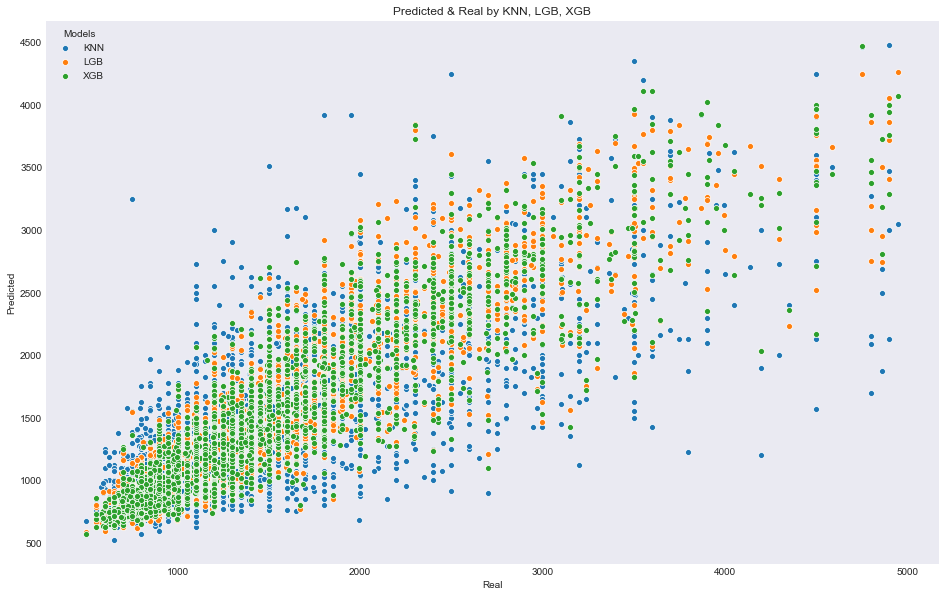

<Figure size 1152x720 with 0 Axes>

In [3]:
cmap = sns.cubehelix_palette(dark=.2, light=.8, as_cmap=True)
plt.rcParams["figure.figsize"] = (16,10)
ax = sns.scatterplot(x = 'rent_price', y = 'predictions_knn', palette="Set2", sizes=(200, 20), hue_norm=(0, 7),
                     legend="full", data = results_KNN)

cmap = sns.cubehelix_palette(dark=.2, light=.8, as_cmap=True)
plt.rcParams["figure.figsize"] = (16,10)
ax = sns.scatterplot(x = 'rent_price', y = 'predictions_lgb', palette="Set2", sizes=(200, 20), hue_norm=(0, 7),
                     legend="full", data = results_LGB)

cmap = sns.cubehelix_palette(dark=.2, light=.8, as_cmap=True)
plt.rcParams["figure.figsize"] = (16,10)
ax = sns.scatterplot(x = 'rent_price', y = 'predictions_tuned_Xgb', palette="Set2", sizes=(200, 20), hue_norm=(0, 7),
                     legend="full", data = results_XGB)
plt.title('Predicted & Real by KNN, LGB, XGB')
ax.set(xlabel='Real', ylabel='Predicted')
plt.legend(title='Models', loc='upper left', labels=['KNN', 'LGB','XGB'])
plt.plot()
plt.show()
plt.savefig('images/Predicted_Real_all_models.jpg')

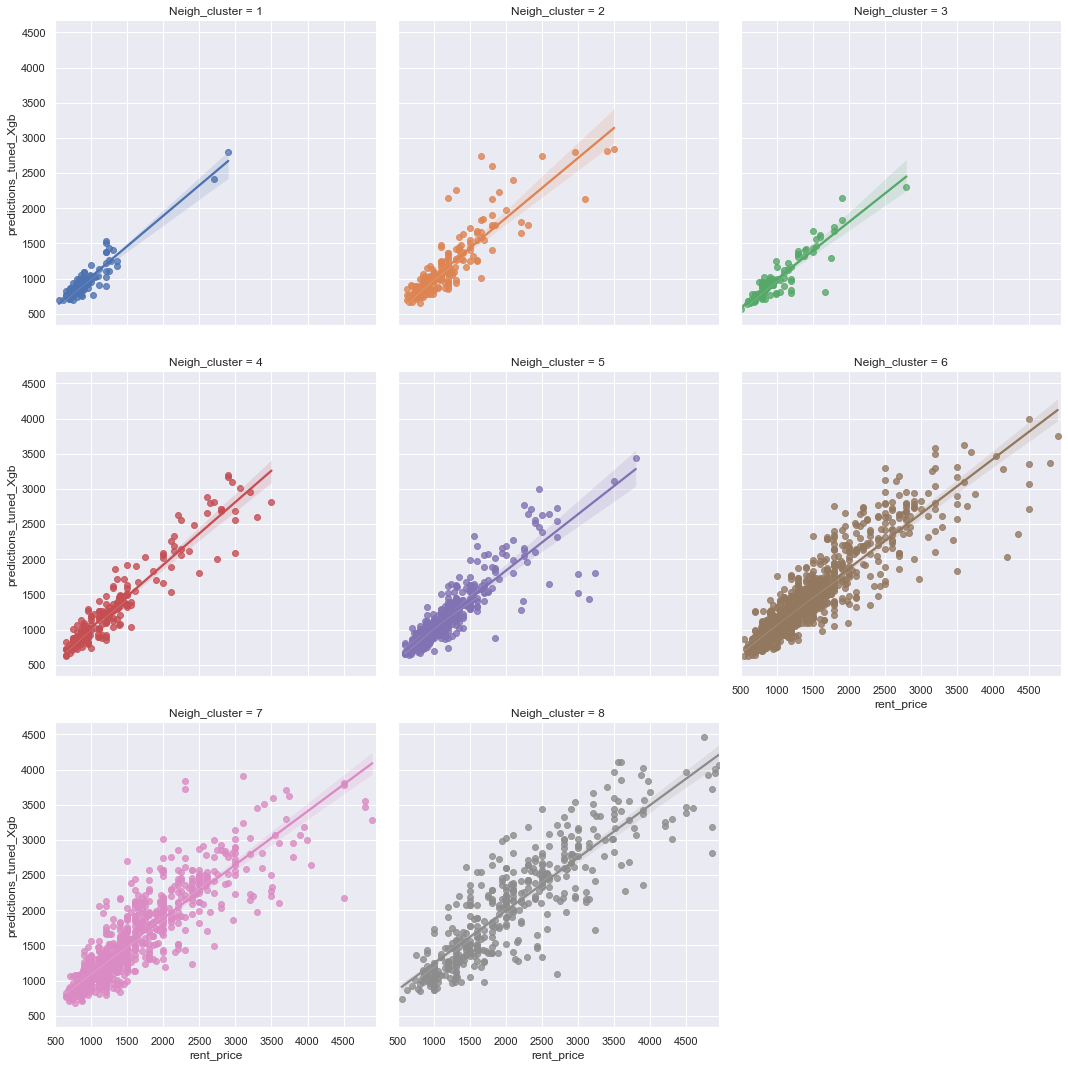

In [4]:
#Residuals distibution by neighborhood groups (0-8)
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = (16,10)
ax = sns.lmplot(x = 'rent_price', y = 'predictions_tuned_Xgb', hue='Neigh_cluster', 
           col="Neigh_cluster", col_wrap=3, data = results_XGB, x_jitter=.05)
plt.savefig('images/Residuals_XGB_groups.jpg')

In [5]:
#Compare observations with relative residuals lower 10% and higher 10% in XGB models (since it shows best performance)
eval_less_10 = results_XGB[results_XGB.resid_percent_Xgb<10]
eval_more_10 = results_XGB[results_XGB.resid_percent_Xgb>10]

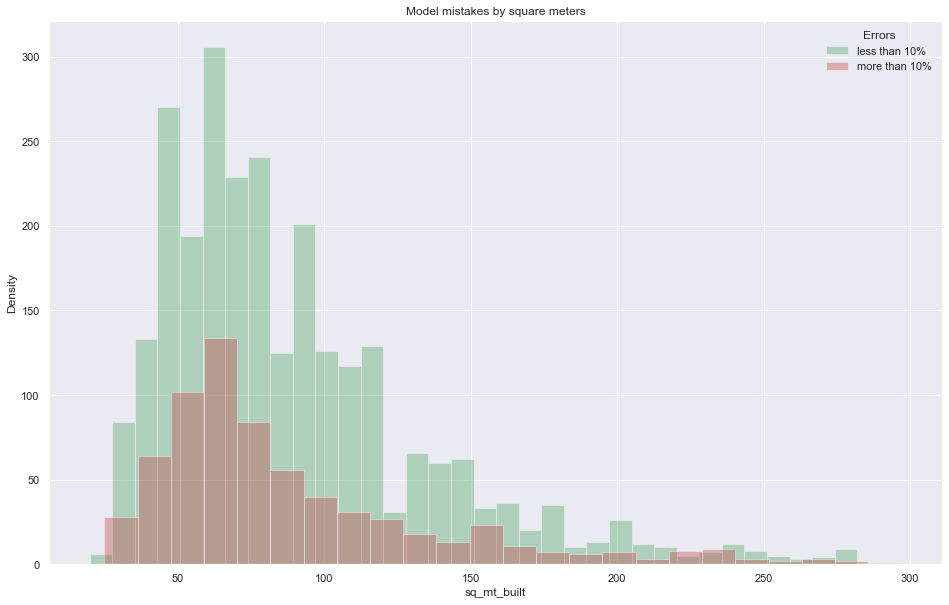

In [6]:
#Error analysis by square meters
plt.figure(figsize=(16, 10))
sns.distplot(eval_less_10.sq_mt_built, color="g", kde=False)
sns.distplot(eval_more_10.sq_mt_built, color="r", kde=False)
plt.ylabel('Density')
plt.title('Model mistakes by square meters')
plt.legend(title='Errors', loc='upper right', labels=['less than 10%','more than 10%'])
plt.savefig('images/Model_mistakes_sq_mt_built.jpg')
plt.show()

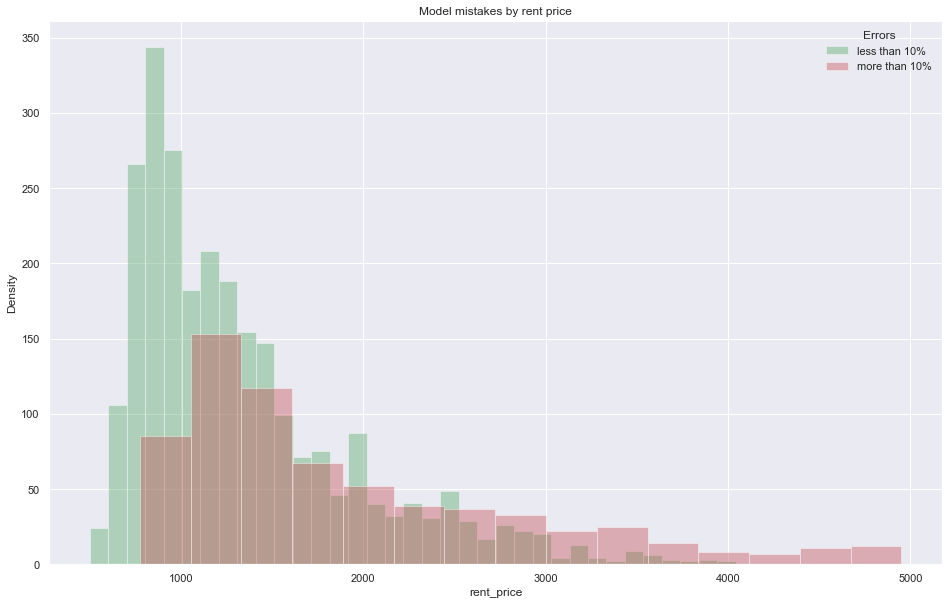

In [11]:
#Error analysis by rent price
plt.figure(figsize=(16, 10))
sns.distplot(eval_less_10.rent_price, color='g', kde=False) #Errors less than 10%
sns.distplot(eval_more_10.rent_price, color='r', kde=False) #Errors more than 10%
plt.ylabel('Density')
plt.title('Model mistakes by rent price')
plt.legend(title='Errors', loc='upper right', labels=['less than 10%','more than 10%'])
plt.savefig('images/Model_mistakes_by_price.jpg')
plt.show()

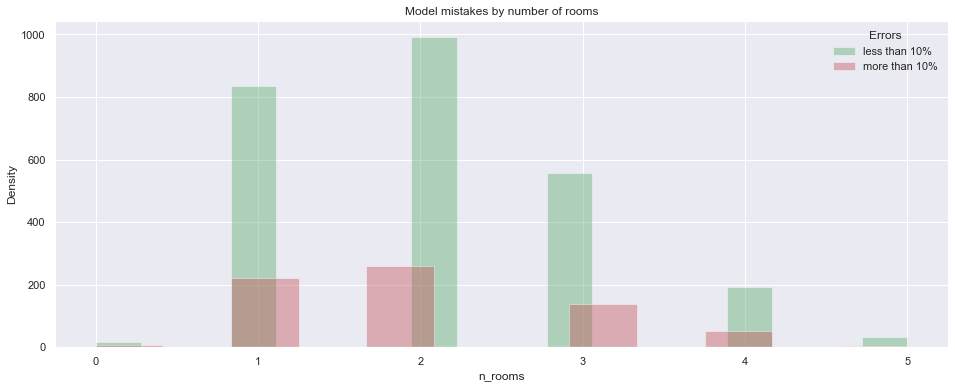

In [12]:
#Error analysis by number of rooms
plt.figure(figsize=(16, 6))
sns.distplot(eval_less_10.n_rooms, color="g", kde=False)
sns.distplot(eval_more_10.n_rooms, color="r", kde=False)

plt.ylabel('Density')
plt.title('Model mistakes by number of rooms')
plt.legend(title='Errors', loc='upper right', labels=['less than 10%','more than 10%'])
plt.savefig('images/Model_mistakes_n_rooms.jpg')
plt.show()

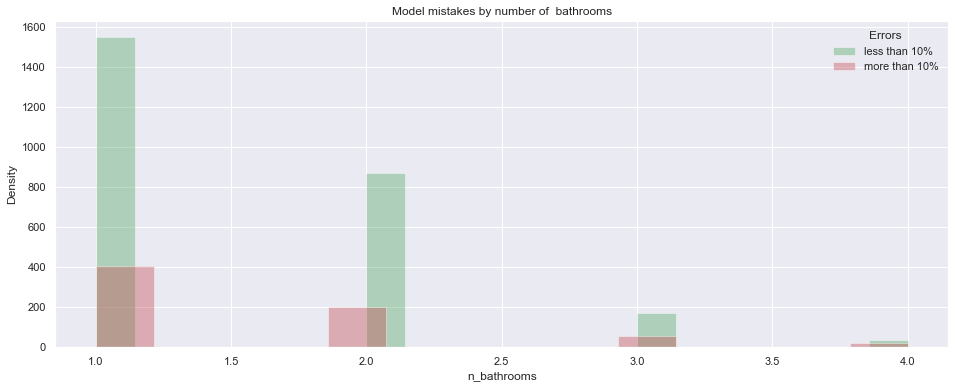

In [13]:
#Error analysis by number of bathrooms
plt.figure(figsize=(16, 6))
sns.distplot(eval_less_10.n_bathrooms, color="g", kde=False)
sns.distplot(eval_more_10.n_bathrooms, color="r", kde=False)
plt.ylabel('Density')
plt.title('Model mistakes by number of  bathrooms')
plt.legend(title='Errors', loc='upper right', labels=['less than 10%','more than 10%'])
plt.savefig('images/Model_mistakes_n_bathrooms.jpg')
plt.show()

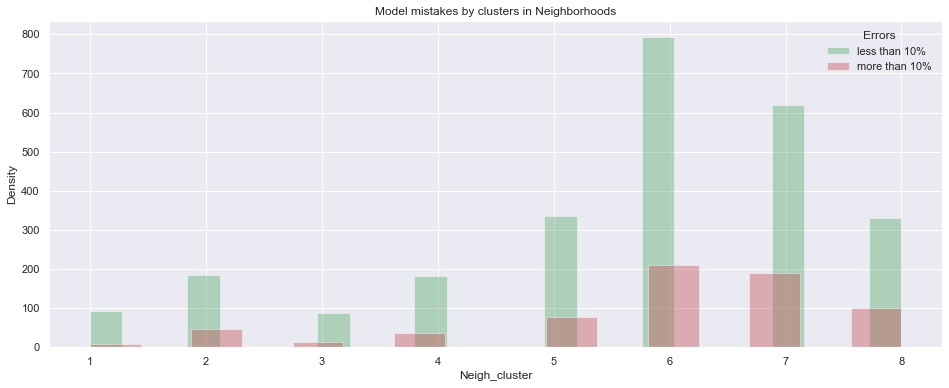

In [14]:
#Error analysis by Neighborhood clusters
plt.figure(figsize=(16, 6))
sns.distplot(eval_less_10.Neigh_cluster,  color="g", kde=False)
sns.distplot(eval_more_10.Neigh_cluster,  color="r", kde=False)
plt.ylabel('Density')
plt.title('Model mistakes by clusters in Neighborhoods')
plt.legend(title='Errors', loc='upper right', labels=['less than 10%','more than 10%'])
plt.savefig('images/Model_mistakes_Neighborhoos_groups.jpg')
plt.show()